<h1>Activation Functions</h1>

<p>The activation function defines the output of a neuron / node given an input or set of input (output of multiple neurons)

The output of the activation function to the next layer (in shallow neural network: input layer and output layer, and in deep network to the next hidden layer) is called forward propagation (information propagation). It’s considered as a non linearity transformation of a neural network.</p>

    > Binary
    > Linear
    > Sigmoid
    > Tanh
    > ReLU
    > Leaky ReLU (LReLU)
    > Parametric ReLU (PReLU)
    > Exponential Linear Unit (eLU)
    > ReLU-6
    > Softplus
    > Softsign
    > Softmax
    > Swish

In [4]:
%matplotlib inline
import numpy
import matplotlib.pyplot as plt
import seaborn
import math

<h2>X initilisation</h2>

In [5]:
x = numpy.linspace(-10, 10, 5000)
x

array([-10.       ,  -9.9959992,  -9.9919984, ...,   9.9919984,
         9.9959992,  10.       ])

<h2><u>Binary Activation function</u></h2>

The binary activation function is the simpliest. It’s based on binary classifier, the output is 0 if values are negatives else 1. See this activation function as a threshold in binary classification.

    Pro: Binary classification
    Cons:
        1.Doesn’t work in multilabel classification
        2.The derivative for the gradient calculation is always 0 so impossible to update weights

In [6]:
def binary_active_function(x):
    return 0 if x < 0 else 1

In [7]:
y = [binary_active_function(i) for i in x]

Text(0.5, 1.0, 'Binary activation function')

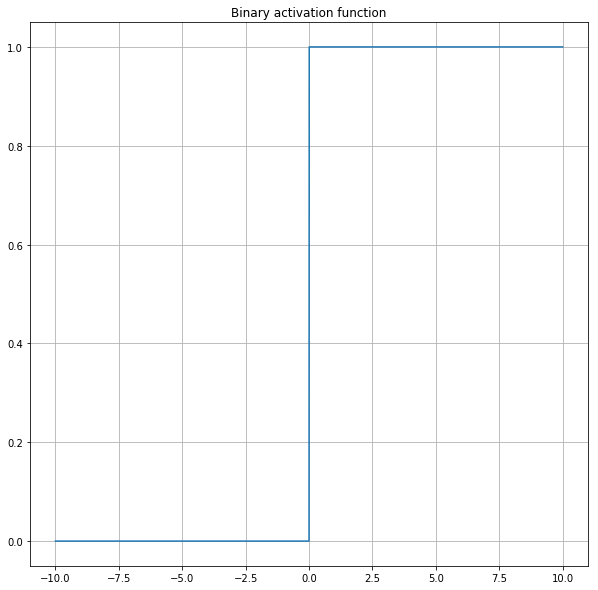

In [8]:
plt.figure(figsize=(10,10))
plt.plot(x,y)
plt.grid(True)
plt.title("Binary activation function")

<h2><u>Linear Activation function</u></h2>
The output is proportional to the input

    Pros:
        1.Binary and multiclass classification
        2.Highly interpretable
    Cons:
        1.The derivative correspond to “a” so the update of weights and biaises during the backprogation will be constant.
        2.Not efficient if the gradient is always the same.

In [9]:
def linear_active_function(a, x):
    return a*x

In [10]:
y_1 = [linear_active_function(0.25, i) for i in x]
y_2 = [linear_active_function(0.5, i) for i in x]
y_3 = [linear_active_function(1, i) for i in x]
y_4 = [linear_active_function(2, i) for i in x]

Text(0.5, 1.0, 'Linear activation function')

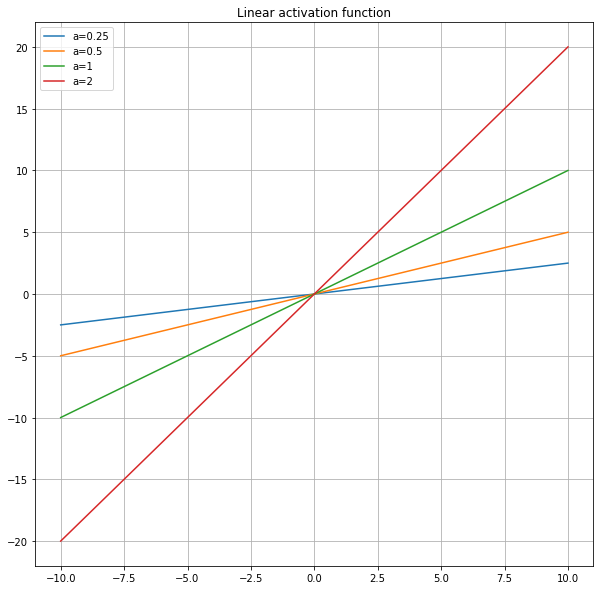

In [11]:
plt.figure(figsize=(10,10))
plt.plot(x,y_1, label="a=0.25")
plt.plot(x,y_2, label="a=0.5")
plt.plot(x,y_3, label="a=1")
plt.plot(x,y_4, label="a=2")
plt.legend()
plt.grid(True)
plt.title("Linear activation function")

<h2><u>Sigmoid Activation function</u></h2>

Sigmoid is the most used activation function with ReLU and tanh. It’s a non-linear activation function also called logistic function. The output of this activation function vary between 0 and 1. All the output of neurons will be positive.

    Cons:
        1.The problem of this function is that the output of each neuron can saturate. Values greater than 1 are shape as 1 and values smaller than 0 are shape as 0.
        2.The best sensitivity for the sigmoid function is around the central point (0, 0.5).
        3.A big problem appear during the saturation, the algorithm can not learn during this position (it’s the source of the vanishing gradient problem, corresponding to the absence of direction in the gradient).


In [16]:
def sigmoid_active_function(x):
    return 1./(1+numpy.exp(-x))

In [17]:
y = [sigmoid_active_function( i) for i in x]

Text(0.5, 1.0, 'Sigmoid activation function')

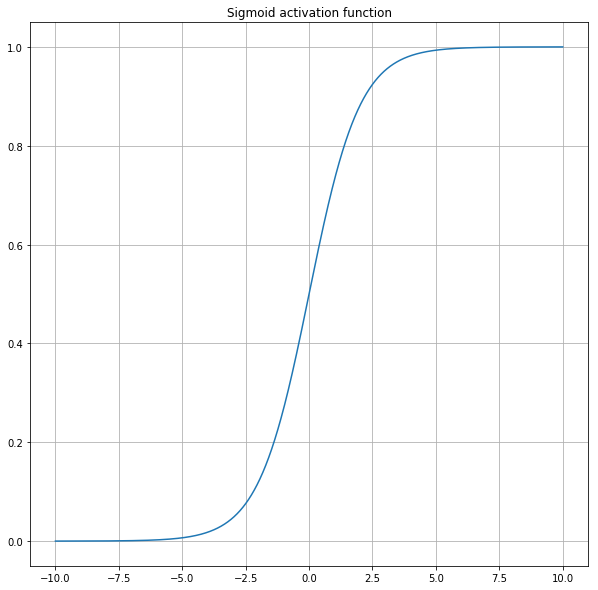

In [18]:
plt.figure(figsize=(10,10))
plt.plot(x,y)
plt.grid(True)
plt.title("Sigmoid activation function")

<h2><u>tanh Activation function</u></h2>
The tangent hyperbolic function (tanh) is similar to the sigmoïd function in the way that their form are similar. Tanh is symmetric in 0 and the values are in the range -1 and 1. As the sigmoid they are very sensitive in the central point (0, 0) but they saturate for very large number (positive and negative). This symmetry make them better than the sigmoid function.

    Pros:
        1.Range between -1 and 1
        2.The gradient is stronger than sigmoid ( derivatives are steeper)
    Cons:
        1.Like sigmoid, tanh also has a vanishing gradient problem
        2.Saturation

In [21]:
def tanh_active_function(x):
    return 2*sigmoid_active_function(2*x)-1


In [22]:
y = [tanh_active_function( i) for i in x]

Text(0.5, 1.0, 'tanh activation function')

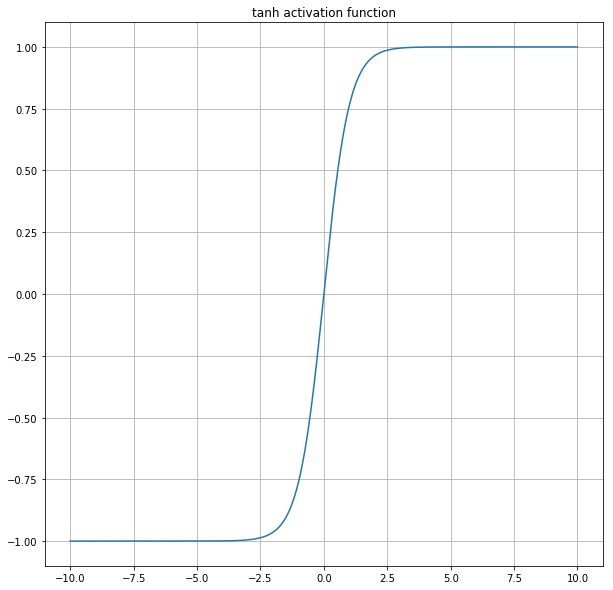

In [23]:
plt.figure(figsize=(10,10))
plt.plot(x,y)
plt.grid(True)
plt.title("tanh activation function")

<h2><u>REctified Linear Unit (ReLU) Activation function</u></h2>

The REctified Linear Unit was develop to avoid the saturation with big positive numbers. The non-linearity permit to conserve and learn the patterns inside the data and the linear part (>0 — also called piecewise linear function) make them easily interpretable.

    Pros:
        1.Easy to implement and very fast
        1.True 0 value
        3.Optimization are easy when activation function are linear
        4.Most used in the neural networks ecosystem
    Cons:
        1.The function can not be differentiable when x = 0. The gradient descent can’t be computed for this point but, in practice that has not an influence. The linear part correspond to a slope with value 1 and the negative part is equal to zero.
        2.“dying ReLU problem”: corresponds to the inactive part of the neurons if the output are 0. There no gradient when neurons are not active so if a large part of neurons are not activated it can result of poor performance of the model
        3.Not appropriate for RNN class algorithm (RNN, LSTM, GRU)

In [24]:
def relu_active_function(x):
    return numpy.array([0, x]).max()


In [25]:
y = [relu_active_function( i) for i in x]

Text(0.5, 1.0, 'ReLU activation function')

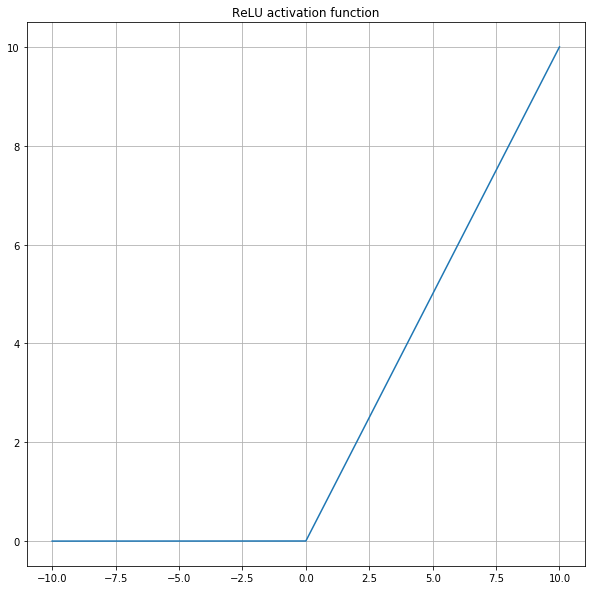

In [26]:
plt.figure(figsize=(10,10))
plt.plot(x,y)
plt.grid(True)
plt.title("ReLU activation function")

<h2><u>Leaky REctified Linear Unit (LReLU) Activation function</u></h2>

This activation function is a modification of the ReLU activation function to avoid the “dying problem”. The function return a 
linear slope where a=0.01 which permit to keep neurons activated with a gradient flow.

    Pros:
        1.Correct the “dying ReLU problem”
        2.Same comportement of the ReLU activation function for the part y=x

In [35]:
def leaky_relu_active_function(x):
    return 0.01*x if x < 0 else x


In [36]:
y = [leaky_relu_active_function( i) for i in x]

Text(0.5, 1.0, 'Leaky ReLU activation function')

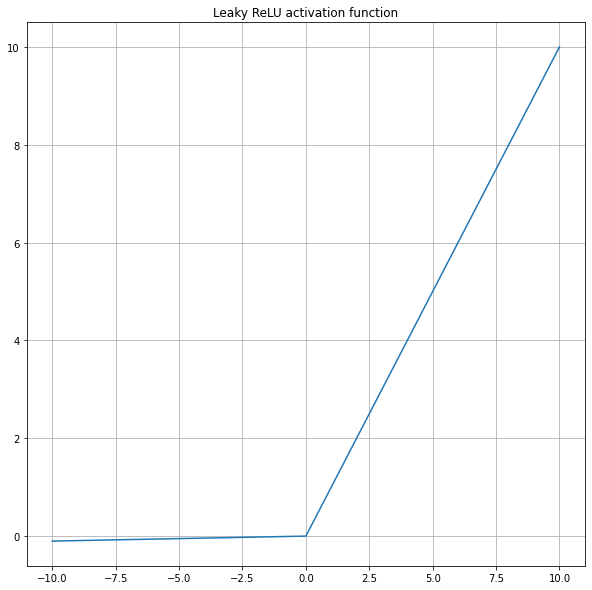

In [37]:
plt.figure(figsize=(10,10))
plt.plot(x,y)
plt.grid(True)
plt.title("Leaky ReLU activation function")

<h2><u>Parametric REctified Linear Unit (PReLU) Activation function</u></h2>

To avoid the “dying ReLU problem”, the parametric or parametrised ReLU. The coefficient a is not lock at 0.01 (Leaky ReLU) but it free to estimate. It’s a generalization of the ReLU, the algorithm learn the rectifier parameter.

    Pros:
        1.Generalize the ReLU activation function
        2.Avoid the “dying ReLU problem”
        3.The parameter “a” is learned by the neural network

In [38]:
def parametric_relu_active_function(a, x):
    return a*x if x < 0 else x


In [39]:
y_1 = [parametric_relu_active_function(0.25, i) for i in x]
y_2 = [parametric_relu_active_function(0.5, i) for i in x]
y_3 = [parametric_relu_active_function(1, i) for i in x]
y_4 = [parametric_relu_active_function(2, i) for i in x]

Text(0.5, 1.0, 'Parametric ReLU activation function')

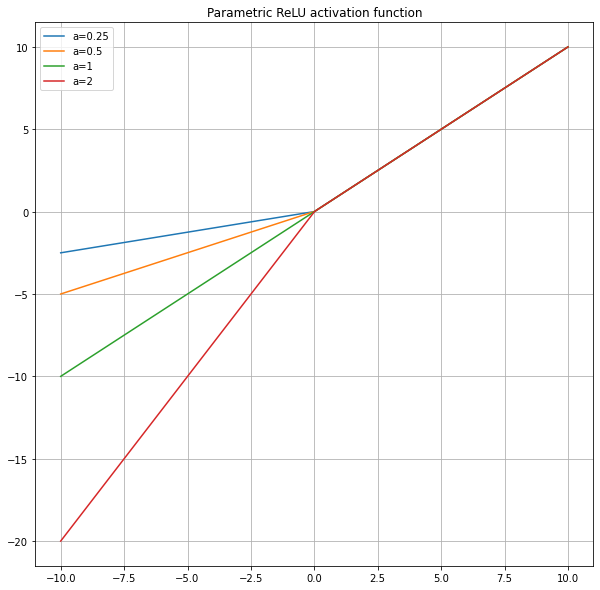

In [40]:
plt.figure(figsize=(10,10))
plt.plot(x,y_1, label="a=0.25")
plt.plot(x,y_2, label="a=0.5")
plt.plot(x,y_3, label="a=1")
plt.plot(x,y_4, label="a=2")
plt.legend()
plt.grid(True)
plt.title("Parametric ReLU activation function")

<h2><u>Exponential Linear Unit (eLU) Activation function</u></h2>

eLU is another variation of the ReLU function. The negative part of the function is handled by the exponential function with a slow smooth.

    Pros:
        1.ELU becomes smooth slowly until its output equal to -α whereas RELU sharply smoothes.
        2.ELU is a strong alternative to ReLU.
        3.Unlike to ReLU, ELU can produce negative outputs.
    Cons:
        1.For x > 0, it can blow up the activation with the output range of [0, inf].


In [27]:
def elu_active_function(a, x):
    return a*(numpy.exp(x)-1) if x < 0 else x

In [28]:
y_1 = [elu_active_function(0.25, i) for i in x]
y_2 = [elu_active_function(0.5, i) for i in x]
y_3 = [elu_active_function(1, i) for i in x]
y_4 = [elu_active_function(2, i) for i in x]

Text(0.5, 1.0, 'eLU activation function')

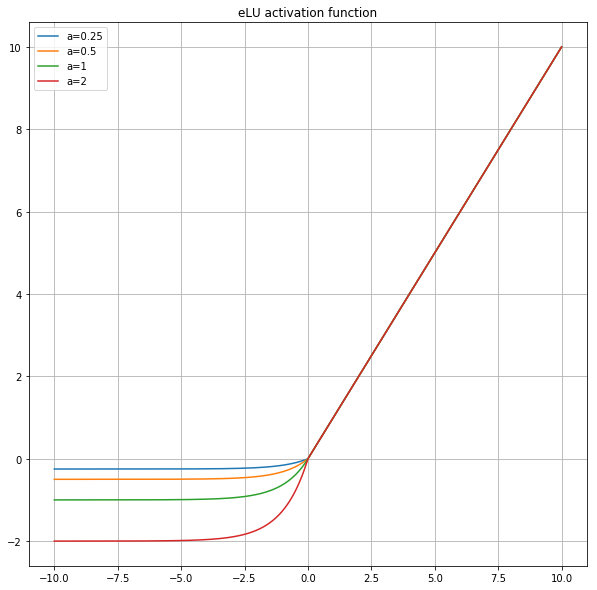

In [29]:
plt.figure(figsize=(10,10))
plt.plot(x,y_1, label="a=0.25")
plt.plot(x,y_2, label="a=0.5")
plt.plot(x,y_3, label="a=1")
plt.plot(x,y_4, label="a=2")
plt.legend()
plt.grid(True)
plt.title("eLU activation function")

<h2><u>ReLU-6</u></h2>

 6 is an arbitrary parameter fixed by hand. The advantage is to shape the output for large positive number to the 6 value.
 

In [30]:
def relu_6_active_function(x):
    return numpy.array([0, x]).max() if x<6 else 6

In [31]:
y = [relu_6_active_function(i) for i in x]

Text(0.5, 1.0, 'ReLU-6 activation function')

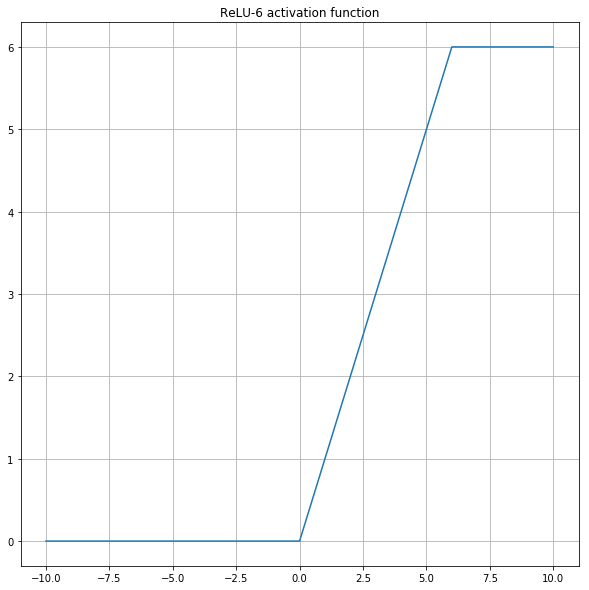

In [32]:
plt.figure(figsize=(10,10))
plt.plot(x,y)
plt.grid(True)
plt.title("ReLU-6 activation function")
#plt.savefig("../fig_articles/relu6_activation_function.jpg")

<h2><u>Sofplus Activation function</u></h2>

The softplus activation function is an alternative of sigmoid and tanh functions. This functions have limits (upper, lower) but softplus is in the range (0, +inf).

In [33]:
def softplus_active_function(x):
    return math.log(1+numpy.exp(x))

In [34]:
y = [softplus_active_function(i) for i in x]

Text(0.5, 1.0, 'Softplus activation function')

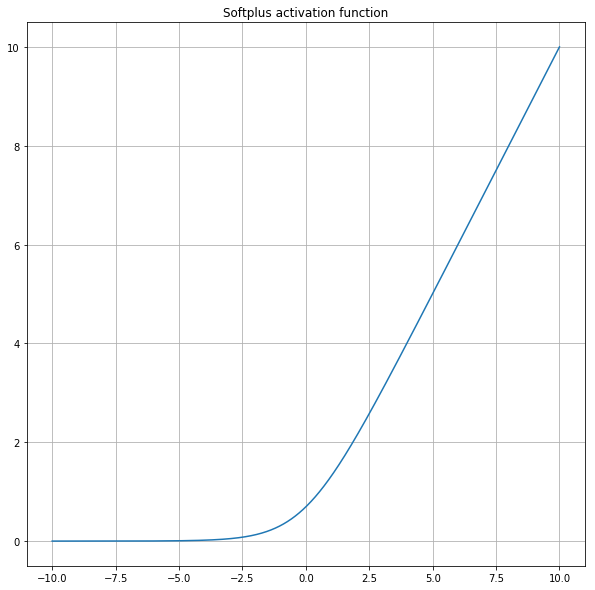

In [35]:
plt.figure(figsize=(10,10))
plt.plot(x,y)

plt.grid(True)
plt.title("Softplus activation function")
#plt.savefig("../fig_articles/softplus_activation_function.jpg")

<h2><u>Softsign Activation function</u></h2>

This activation function is a variation of tanh but is not very used in practice. tanh and softsign functions are closely related, tanh converges exponentially whereas softsign converges polynomially.


In [93]:
def softsign_active_function(x):
    return x / (1 + abs(x) )

In [94]:
y = [softsign_active_function(i) for i in x]

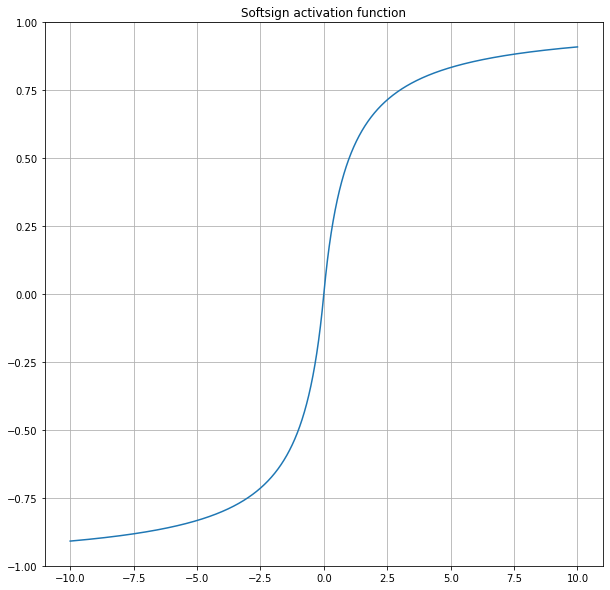

In [95]:
plt.figure(figsize=(10,10))
plt.plot(x,y)
plt.grid(True)
plt.title("Softsign activation function")
#plt.savefig("../fig_articles/softsign_activation_function.jpg")

<h2><u>Softmax Activation function</u></h2>
The softmax activation function is different from the other because it compute the probability distribution. The sum of the output is equal to 1.


In [50]:
def sorftmax_active_function(x):
    return numpy.exp(x)/numpy.sum(numpy.exp(x))


In [56]:
x_soft = [ 0.8, 1.2, 2.1, 3.5]

In [57]:
y = sorftmax_active_function(x_soft)

In [58]:
numpy.sum(y)

0.9999999999999999

Text(0.5, 1.0, 'Softmax activation function')

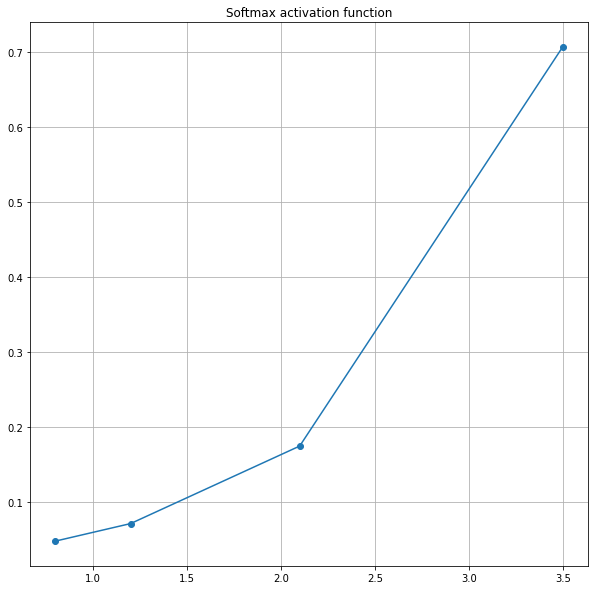

In [60]:
plt.figure(figsize=(10,10))
plt.plot(x_soft,y, "-o")

plt.grid(True)
plt.title("Softmax activation function")

<h2><u>Gaussian Activation function</u></h2>

In [110]:
def gaussian_active_function(x):
    return numpy.exp(-pow(x,2))

In [111]:
y = [gaussian_active_function(i) for i in x]

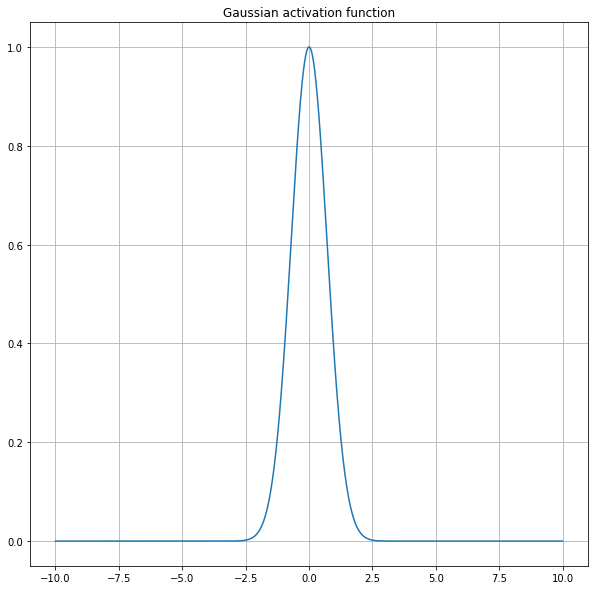

In [112]:
plt.figure(figsize=(10,10))
plt.plot(x,y)
plt.grid(True)
plt.title("Gaussian activation function")
plt.savefig("../fig_articles/gaussian.jpg")

<h2><u>Swish Activation function</u></h2>

In [63]:
def swish_active_function(x):
    return x/(1+numpy.exp(-x))

In [61]:
def swish_active_function2(x):
    return x*sigmoid_active_function(x)

In [64]:
y_1 = [swish_active_function(i) for i in x]
y_2 = [swish_active_function2(i) for i in x]

Text(0.5, 1.0, 'Swish activation function')

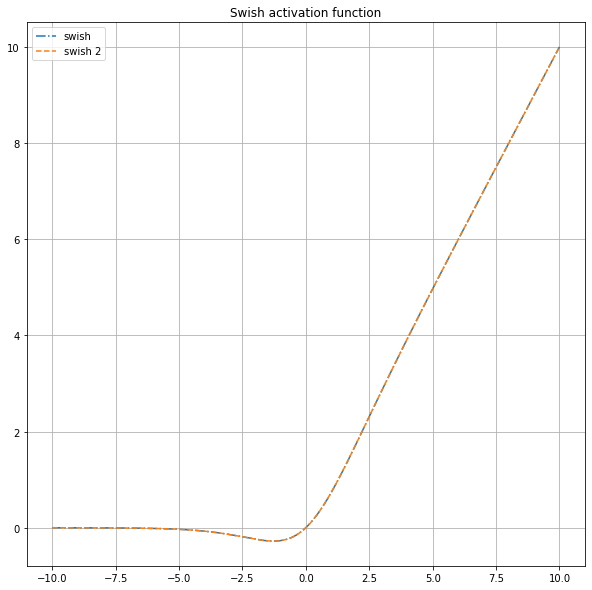

In [69]:
plt.figure(figsize=(10,10))
plt.plot(x,y_1, '-.', label="swish")
plt.plot(x,y_2, '--', label="swish 2")
plt.legend()
plt.grid(True)
plt.title("Swish activation function")

<h2><u>All in one</u> (without softmax)</h2>

In [107]:
y_bin = [binary_active_function(i) for i in x]
y_lin = [linear_active_function(0.5, i) for i in x]
y_sig = [sigmoid_active_function(i) for i in x]
y_tan = [tanh_active_function(i) for i in x]
y_relu= [relu_active_function(i) for i in x]
y_leak= [leaky_relu_active_function(i) for i in x]
y_para= [parametric_relu_active_function(0.25, i) for i in x]
y_elu = [elu_active_function(1, i) for i in x]
y_re6 = [relu_6_active_function(i) for i in x]
y_plus= [softplus_active_function(i) for i in x]
y_sign= [softsign_active_function(i) for i in x]
y_gaus= [gaussian_active_function(i) for i in x]
y_swi = [swish_active_function(i) for i in x]

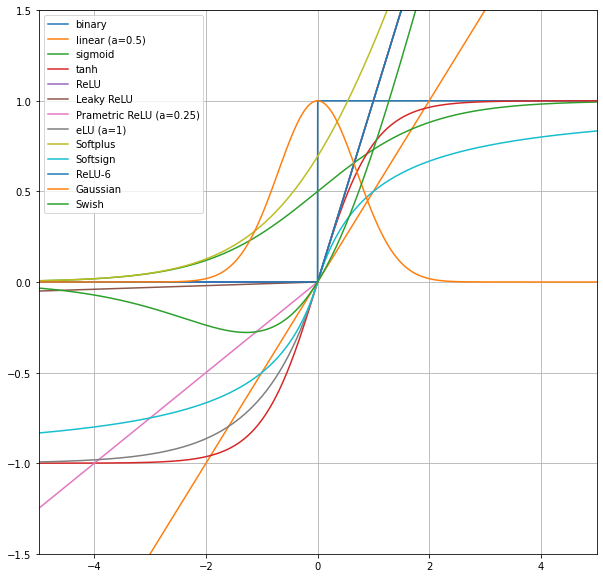

In [109]:
plt.figure(figsize=(10,10))
plt.plot(x, y_bin, label="binary")
plt.plot(x, y_lin, label="linear (a=0.5)")
plt.plot(x, y_sig, label="sigmoid")
plt.plot(x, y_tan, label="tanh")
plt.plot(x, y_relu, label="ReLU")
plt.plot(x, y_leak, label="Leaky ReLU")
plt.plot(x, y_para, label="Prametric ReLU (a=0.25)")
plt.plot(x, y_elu, label="eLU (a=1)")
plt.plot(x, y_plus, label="Softplus")
plt.plot(x, y_sign, label="Softsign")
plt.plot(x, y_re6, label="ReLU-6")
plt.plot(x, y_gaus, label="Gaussian")
plt.plot(x, y_swi, label="Swish")
plt.legend()
plt.grid(True)
plt.xlim(-5,5)
plt.ylim(-1.5,1.5)
#plt.savefig("../fig_articles/all_in_one.jpg")